In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
df = pd.read_csv('data.csv', header=None)

In [3]:
# df[df[3] == '?'].index.values
# df.shape
# df.drop(df[df[3] == '?'])
print (df.shape)

(690, 16)


In [4]:
for column in [0,1,3,4,5,6,13]:
#     print (column)
    df.drop(index=df[df[column] == '?'].index.values, inplace=True)
    
print (df.shape)

(653, 16)


In [5]:
df[:6]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [6]:
col_numberic = [1,2,7,10,13,14]
col_category = [0,3,4,5,6,8,9,11,12,15]
df[col_numberic] = df[col_numberic].astype(float)
df[col_category] = df[col_category].astype('category')
print (df.dtypes)

0     category
1      float64
2      float64
3     category
4     category
5     category
6     category
7      float64
8     category
9     category
10     float64
11    category
12    category
13     float64
14     float64
15    category
dtype: object


In [7]:
# Category features => one hot encoding vectors
train_df = pd.get_dummies(df)
train_df[:4]

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,15_+,15_-
0,30.83,0.00,1.25,1.0,202.0,0.0,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
1,58.67,4.46,3.04,6.0,43.0,560.0,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
2,24.50,0.50,1.50,0.0,280.0,824.0,1,0,0,1,...,1,1,0,1,0,1,0,0,1,0
3,27.83,1.54,3.75,5.0,100.0,3.0,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0


In [8]:
# Normalize data
ss = StandardScaler()
train_df[col_numberic] = ss.fit_transform(train_df[col_numberic])
train_df[:4]

,1,2,7,10,13,14,0_a,0_b,3_l,3_u,...,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s,15_+,15_-
0,-0.056962,-0.961440,-0.295171,-0.302596,0.128682,-0.193125,0,1,0,1,...,1,0,1,1,0,1,0,0,1,0
1,2.296536,-0.073565,0.236217,0.704516,-0.816802,-0.086443,1,0,0,1,...,1,0,1,1,0,1,0,0,1,0
2,-0.592078,-0.861903,-0.220955,-0.504019,0.592504,-0.036150,1,0,0,1,...,1,1,0,1,0,1,0,0,1,0
3,-0.310572,-0.654865,0.446990,0.503093,-0.477855,-0.192553,0,1,0,1,...,1,0,1,0,1,1,0,0,1,0


In [9]:
all_names = list(train_df.columns.values)
name_col_x = all_names[:-2]
name_col_Y = all_names[-2]
print (name_col_x)
print (name_col_Y)

[1, 2, 7, 10, 13, 14, '0_a', '0_b', '3_l', '3_u', '3_y', '4_g', '4_gg', '4_p', '5_aa', '5_c', '5_cc', '5_d', '5_e', '5_ff', '5_i', '5_j', '5_k', '5_m', '5_q', '5_r', '5_w', '5_x', '6_bb', '6_dd', '6_ff', '6_h', '6_j', '6_n', '6_o', '6_v', '6_z', '8_f', '8_t', '9_f', '9_t', '11_f', '11_t', '12_g', '12_p', '12_s']
15_+


In [10]:
X_data = train_df[name_col_x].values
Y_data = train_df[name_col_Y].values

In [27]:
# Choose the model here!!!!
# clf = svm.SVC(gamma='auto')
clf = svm.SVC(gamma=0.01, C=1.)
# clf = tree.DecisionTreeClassifier()

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.33, random_state=42)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# precision_recall_fscore_support(y_test, y_pred)
# clf.score(X_test, y_test)
# report_lr = precision_recall_fscore_support(y_test, y_pred, average='binary')
# print ("\nprecision = %0.2f, recall = %0.2f, F1 = %0.2f, accuracy = %0.2f\n" % \
#            (report_lr[0], report_lr[1], report_lr[2], accuracy_score(y_test, y_pred)))

In [29]:
scores = cross_validate(clf, X_data, Y_data, cv=StratifiedKFold(n_splits=10, shuffle=True), scoring=['accuracy', 'precision', 'recall'],
                       return_train_score=False)
print (scores.keys())
print (scores['test_accuracy'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall'])
[0.89393939 0.8030303  0.86363636 0.84848485 0.87878788 0.89393939
 0.89230769 0.859375   0.875      0.84375   ]


In [30]:
print ("precision = %0.2f, recall = %0.2f, accuracy = %0.2f" % \
           (scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_accuracy'].mean()))

precision = 0.80, recall = 0.94, accuracy = 0.87


In [37]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']

# Cs = [1.0]
# gammas = ['auto']

param_grid = {'C': Cs, 'gamma' : gammas}
# param_grid = {'gamma' : gammas}
param_grid = {'C': Cs}
# best {'C': 1, 'gamma': 0.01}
grid_search = GridSearchCV(svm.SVC(kernel='rbf', gamma=0.01), param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True))
grid_search.fit(X_data, Y_data)
print (grid_search.best_params_)
print (grid_search.best_score_)
# 0.8652373660030628
# print (grid_search.cv_results_)

{'C': 1}
0.8652373660030628


In [38]:
print (grid_search.grid_scores_)

[mean: 0.54671, std: 0.00246, params: {'C': 0.001}, mean: 0.54671, std: 0.00246, params: {'C': 0.01}, mean: 0.81317, std: 0.02858, params: {'C': 0.1}, mean: 0.86524, std: 0.03301, params: {'C': 1}, mean: 0.86371, std: 0.03407, params: {'C': 10}]


/home/quang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [39]:
prs = grid_search.grid_scores_[0]
print (prs)

mean: 0.54671, std: 0.00246, params: {'C': 0.001}


/home/quang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [41]:
import math
# type(prs[3])
print (prs[0])
para_values = []
acc_vlaues = []
for prs in grid_search.grid_scores_:
    para_values.append(math.log10(prs[0]['C']))
    acc_vlaues.append(prs[1])
    
print (para_values, acc_vlaues)

{'C': 0.001}
[-3.0, -2.0, -1.0, 0.0, 1.0] [0.5467075038284839, 0.5467075038284839, 0.8131699846860643, 0.8652373660030628, 0.8637059724349158]


/home/quang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


No handles with labels found to put in legend.


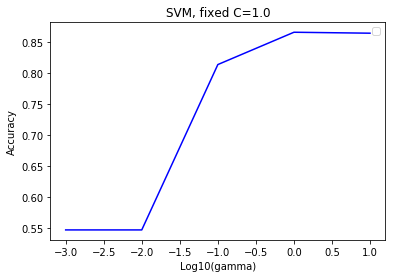

In [42]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(para_values, acc_vlaues, 'b')
# line2, = plt.plot(max_depths, test_results, ‘r’, label='bce')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('SVM, fixed C=1.0')
plt.ylabel('Accuracy')
plt.xlabel('Log10(gamma)')
plt.show()